In [29]:
import pandas as pd #eita nilam .csv file read korar jonno
import matplotlib.pyplot as plt  #eita nilam dataset ta graph a plot kore show korar jonno
%matplotlib inline

In [30]:
df=pd.read_csv('DataSet1.csv') #eita nilam .csv file read korar jonno

,age,status
0,22,0.0
1,33,1.0
2,21,0.0
3,26,1.0
4,43,1.0
5,67,1.0
6,12,0.0
7,45,1.0
8,32,1.0
9,21,0.0


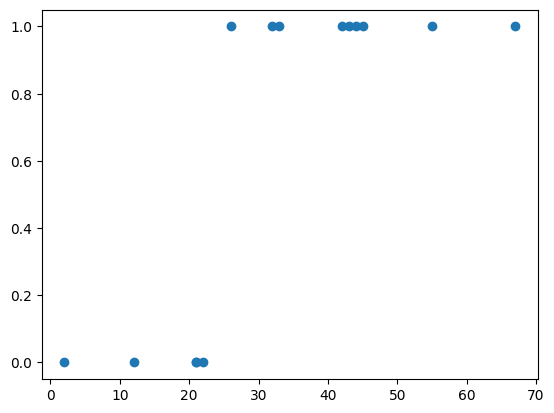

In [31]:
#jodi dataset er target value gula categorical value hisebe thakto tahole taderke binary form a convert kortam ei line ta likhe
#df['status'].replace({'married':'1','unMarried':'0'})


#jodi dataset ta graph a plot korte chai tahole
plt.scatter(x='age',y='status',data=df)

#dataset ta print korlam
df

In [32]:
#check kortesi dataset a kono column a null value ase kina
df.isnull().sum()

,0
age,0
status,1


In [34]:
#status a null value ase
#so status a oi null value er jaygay kisu insert kore dewar jonno akta value dorkar r setai holo median (median mane oi column a j value ta maximum ase seita return korbe)
handle = df['status'].median()

In [9]:
handle

1.0

In [35]:
#median value bar kore oi null value er jaygay insert kore dilam fillna() function er maddhome
df.status = df.status.fillna(handle)

In [11]:
df

,age,status
0,22,0.0
1,33,1.0
2,21,0.0
3,26,1.0
4,43,1.0
5,67,1.0
6,12,0.0
7,45,1.0
8,32,1.0
9,21,0.0


In [36]:
#check kortesi total married koyta ase mane '1' r koyta total unmarried
df['status'].value_counts()

,count
status,
1.0,10
0.0,5


In [39]:
#dataset theke feature value gula alada korlam , ofcourse [[double bracket er vitore feature value likhte hobe]]
x=df[['age']]

In [14]:
x

,age
0,22
1,33
2,21
3,26
4,43
5,67
6,12
7,45
8,32
9,21


In [40]:
#dataset theke target value gula alada korlam
y=df['status']

In [16]:
y

,status
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0
5,1.0
6,0.0
7,1.0
8,1.0
9,0.0


In [41]:
from sklearn.model_selection import train_test_split

#dataset theke train r test korar jonno value gula alada korlam
#ekhane test_size=0.2 mane total dataset theke 20% data test er jonno alada korbe r baki 80% data train er jonno use korabo
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [18]:
xtest

,age
3,26
7,45
6,12


In [19]:
xtrain

,age
2,21
10,14
4,43
1,33
13,2
0,22
14,42
9,21
8,32
12,44


In [42]:
from sklearn.linear_model import LogisticRegression
#eit LogisticRegression class er object diye train r test korate hoy
model = LogisticRegression()

In [21]:
#akhon model ta ke xtrain & ytrain er value diye train korate hobe
model.fit(xtrain,ytrain)

LogisticRegression()

In [22]:
model.predict(xtest)

array([1., 1., 0.])

In [24]:
#miliye dekhbo akn j ytest value er sathe same result kina
ytest

,status
3,1.0
7,1.0
6,0.0


In [25]:
#accurecy check korbo akn
model.score(xtest,ytest)

1.0

In [26]:
#akhon dekhbo sigmoid sunctione ki probability ascilo jar jonno test result oigula asche
model.predict_proba(xtest)

array([[0.38415254, 0.61584746],
       [0.02192074, 0.97807926],
       [0.87856631, 0.12143369]])